# Live Monitoring of CUDA GPU Performance 

This notebook allows you to monitor your CUDA GPU performance live. You will be able to create a live graph of GPU loading and GPU memory usage.
Special thanks to https://www.youtube.com/watch?v=38Kxtf52EcI

In [45]:
import GPUtil
import time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib notebook

In [46]:
# This function will be passed to FuncAnimation method of matplotlib.animation and will be called frequently
# to get gpu loading and memory utilization.

def animate_gpu(i):
    
    gpus = GPUtil.getGPUs()
    gpu = gpus[0]
    gpu_load = gpu.load*100
    gpu_mem = gpu.memoryUtil*100
    gpu_load_history.append(gpu_load)
    gpu_mem_history.append(gpu_mem)
    
    if len(gpu_load_history) <= frame_len:
        plt.cla()
        plt.plot(gpu_load_history, 'r', label = 'GPU load')
        plt.plot(gpu_mem_history, 'b', label = 'GPU memory')        
    else:
        plt.cla()
        plt.plot(gpu_load_history[-frame_len:], 'r', label = 'GPU load')
        plt.plot(gpu_mem_history[-frame_len:], 'b', label = 'GPU memory')
    plt.ylim(-10, 110)
    plt.tight_layout()
    plt.legend(loc = 'lower right')


## Interval:
This is the last argument in the funciton call below. Set the interval to the desired update frequency. This parameter is in milliseconds and defines how many milliseconds of delay should exist befor the graph updates with new data.

<IPython.core.display.Javascript object>


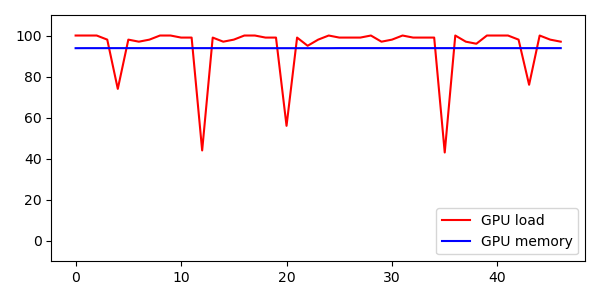

In [47]:
fig = plt.figure(figsize = (6, 3))
frame_len = 200
gpu_load_history = []
gpu_mem_history = []

# set interval to a number smaller than 1000 to see more details that your operating system resource monitor allows you to see.
# interval = 200 means the graph is refreshed 5 times a second.
graph = FuncAnimation(plt.gcf(), animate_gpu, interval = 200)